In [539]:
import numpy as np
import pandas as pd


In [540]:
np.__version__

'1.19.5'

In [541]:
pd.__version__

'1.1.5'

In [542]:
!wget https://raw.githubusercontent.com/asarzina/mlbookcamp-homework/main/data/AB_NYC_2019.csv

--2021-09-19 15:47:37--  https://raw.githubusercontent.com/asarzina/mlbookcamp-homework/main/data/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.12’

AB_NYC_2019.csv.12  100%[===================>]   6.75M  --.-KB/s    in 0.07s   

2021-09-19 15:47:37 (90.3 MB/s) - ‘AB_NYC_2019.csv.12’ saved [7077973/7077973]



In [543]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [544]:
# Del some columns
base = [
  'latitude',
  'longitude',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365'
]

df = df[base]
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [545]:
# Cleaning column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [546]:
df.dtypes
df.dtypes == 'object'

latitude                          False
longitude                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

## Question 1

In [547]:
df.isnull().sum()
# reviews_per_month has 10052 missing values

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Question 2

In [548]:
df['minimum_nights'].median()

3.0

## 

In [549]:
min_reviews_per_month = df['reviews_per_month'].min()
max_reviews_per_month = df['reviews_per_month'].max()
mean_reviews_per_month = df['reviews_per_month'].mean()
median_reviews_per_month = df['reviews_per_month'].median()

min_reviews_per_month, max_reviews_per_month, mean_reviews_per_month, median_reviews_per_month

(0.01, 58.5, 1.3732214298586884, 0.72)

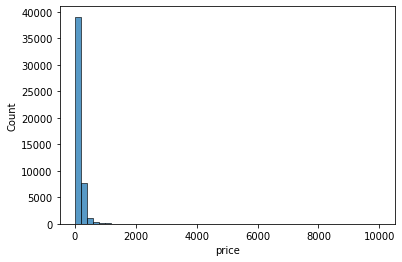

In [550]:
import matplotlib as plt
import seaborn as sns

%matplotlib inline

# show distribution of data

sns.histplot(df.price, bins=50)

In [551]:
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
median_price = df['price'].median()

min_price, max_price, mean_price, median_price

(0, 10000, 152.7206871868289, 106.0)

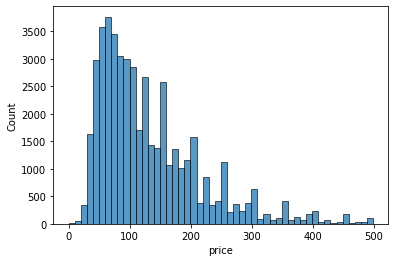

In [552]:
sns.histplot(df.price[df.price < 500], bins=50)

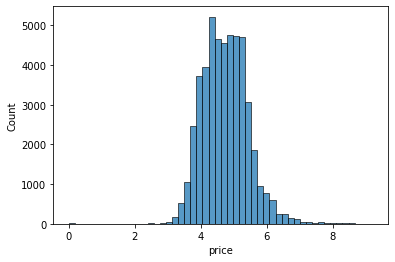

In [553]:
# Apply logarithn to the prices

price_logs = np.log1p(df.price)
sns.histplot(price_logs, bins=50)

In [554]:
# Fill with mean
# df_fill = df['reviews_per_month'].fillna(0)
# df['reviews_per_month'].mean()

In [555]:
# Split data in Train, Validation and Test
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)

# 
n_train = n - n_val - n_test
n_train, n_val, n_test, n_train + n_val + n_test

(29337, 9779, 9779, 48895)

In [556]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [557]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [558]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,95,2,0,NaN,1,0
14661,40.78638,-73.97004,101,30,10,0.40,1,0
24515,40.72716,-73.98524,100,3,75,3.12,1,60
31460,40.79578,-73.94523,68,2,31,2.10,1,265


In [559]:
len(df_train), len(df_val), len(df_test)
# length is ok

(29337, 9779, 9779)

In [560]:
# reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30


In [561]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

y_train, y_val, y_test

(array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
        3.8286414 ]),
 array([3.93182563, 3.76120012, 3.71357207, ..., 4.61512052, 4.56434819,
        4.94875989]),
 array([3.8918203 , 4.79579055, 5.01727984, ..., 4.87519732, 5.01727984,
        4.79579055]))

In [562]:
# Delete price from the training process
del df_train['price']
del df_val['price']
del df_test['price']

df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


In [563]:
base.remove('price')
base

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [564]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]

In [565]:
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [566]:
def prepare_X_with_mean(df):
  df_num = df[base]
  df_num = df_num.fillna(df['reviews_per_month'].mean())
  X = df_num.values
  return X

In [567]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [568]:
X_train = prepare_X(df_train)
X_train

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

## Question 3

In [569]:
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score1 = rmse(y_val, y_pred)
round(score1, 2)

0.64

In [570]:
X_val2 = prepare_X_with_mean(df_val)
y_pred2 = w0 + X_val2.dot(w)

score2 = rmse(y_val, y_pred2)
round(score2, 2)

0.64

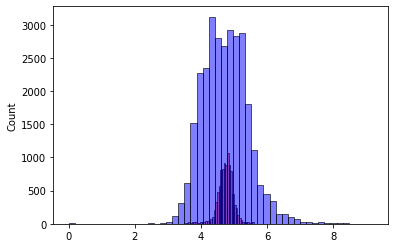

In [571]:
import matplotlib as plt
import seaborn as sns

%matplotlib inline

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [572]:
def train_linear_regression_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

## Question 4

In [573]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)

  score = rmse(y_val, y_pred)

  print (r, w0, round(score, 2))

0.0 -191.7838407751772 0.66
1e-05 -191.7838407751772 0.66
0.0001 -191.7838407751772 0.66
0.001 -191.7838407751772 0.66
0.01 -191.7838407751772 0.66
0.1 -191.7838407751772 0.66
1 -191.7838407751772 0.66
10 -191.7838407751772 0.66


## Question 5

In [574]:
def shuffle_data(seed):
  idx_s = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx_s)

  df_train_s = df.iloc[idx_s[:n_train]]
  df_val_s = df.iloc[idx_s[n_train:n_train+n_val]]
  df_test_s = df.iloc[idx_s[n_train+n_val:]]

  y_train_s = np.log1p(df_train_s.price.values)
  y_val_s = np.log1p(df_val_s.price.values)
  y_test_s = np.log1p(df_test_s.price.values)

  return df_train_s, df_val_s, df_test_s, y_train_s, y_val_s, y_test_s

In [575]:
scores = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  df_train_s, df_val_s, df_test_s, y_train_s, y_val_s, y_test_s = shuffle_data(r)

  X_train = prepare_X(df_train_s)
  w0, w = train_linear_regression_reg(X_train, y_train_s, 0.01)

  X_val = prepare_X(df_val_s)
  y_pred = w0 + X_val.dot(w)

  score = rmse(y_val_s, y_pred)
  scores.append(score)

# STD of RMSE scores for different seeds
std = np.std(scores)
round(std, 3)

0.008

## Question 6

In [576]:
df_train_final, df_val_final, df_test_final, y_train_final, y_val_final, y_test_final = shuffle_data(9)

In [577]:
df_full_train = pd.concat([df_train_final, df_val_final])
df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train_final, y_val_final])
y_full_train

array([4.33073334, 4.24849524, 5.19295685, ..., 4.94875989, 5.37527841,
       4.18965474])

In [578]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)

X_test = prepare_X(df_test_final)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test_final, y_pred)
round(score, 2)

0.65

-------------------------------------------------------------

## Test

In [579]:
apartment_id = 200

apartment = df_test_final.iloc[apartment_id].to_dict()
apartment

{'availability_365': 125.0,
 'calculated_host_listings_count': 8.0,
 'latitude': 40.72074,
 'longitude': -73.9432,
 'minimum_nights': 30.0,
 'number_of_reviews': 4.0,
 'price': 90.0,
 'reviews_per_month': 0.19}

In [580]:
df_small = pd.DataFrame([apartment])
X_small = prepare_X(df_small)

In [581]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
# Il risultato è il logaritmo del prezzo

np.expm1(y_pred), np.expm1(y_test_final[apartment_id])

(108.17643023720177, 89.99999999999997)